In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

In [5]:
df = pd.read_csv('datasets/housing.csv')

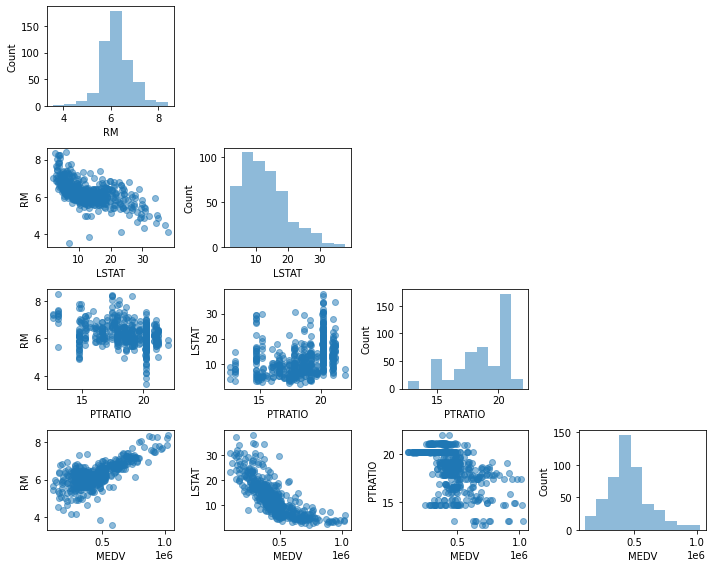

In [6]:
scatterplotmatrix(df.values, figsize=(10, 8), names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-49-5554d33ac38b>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


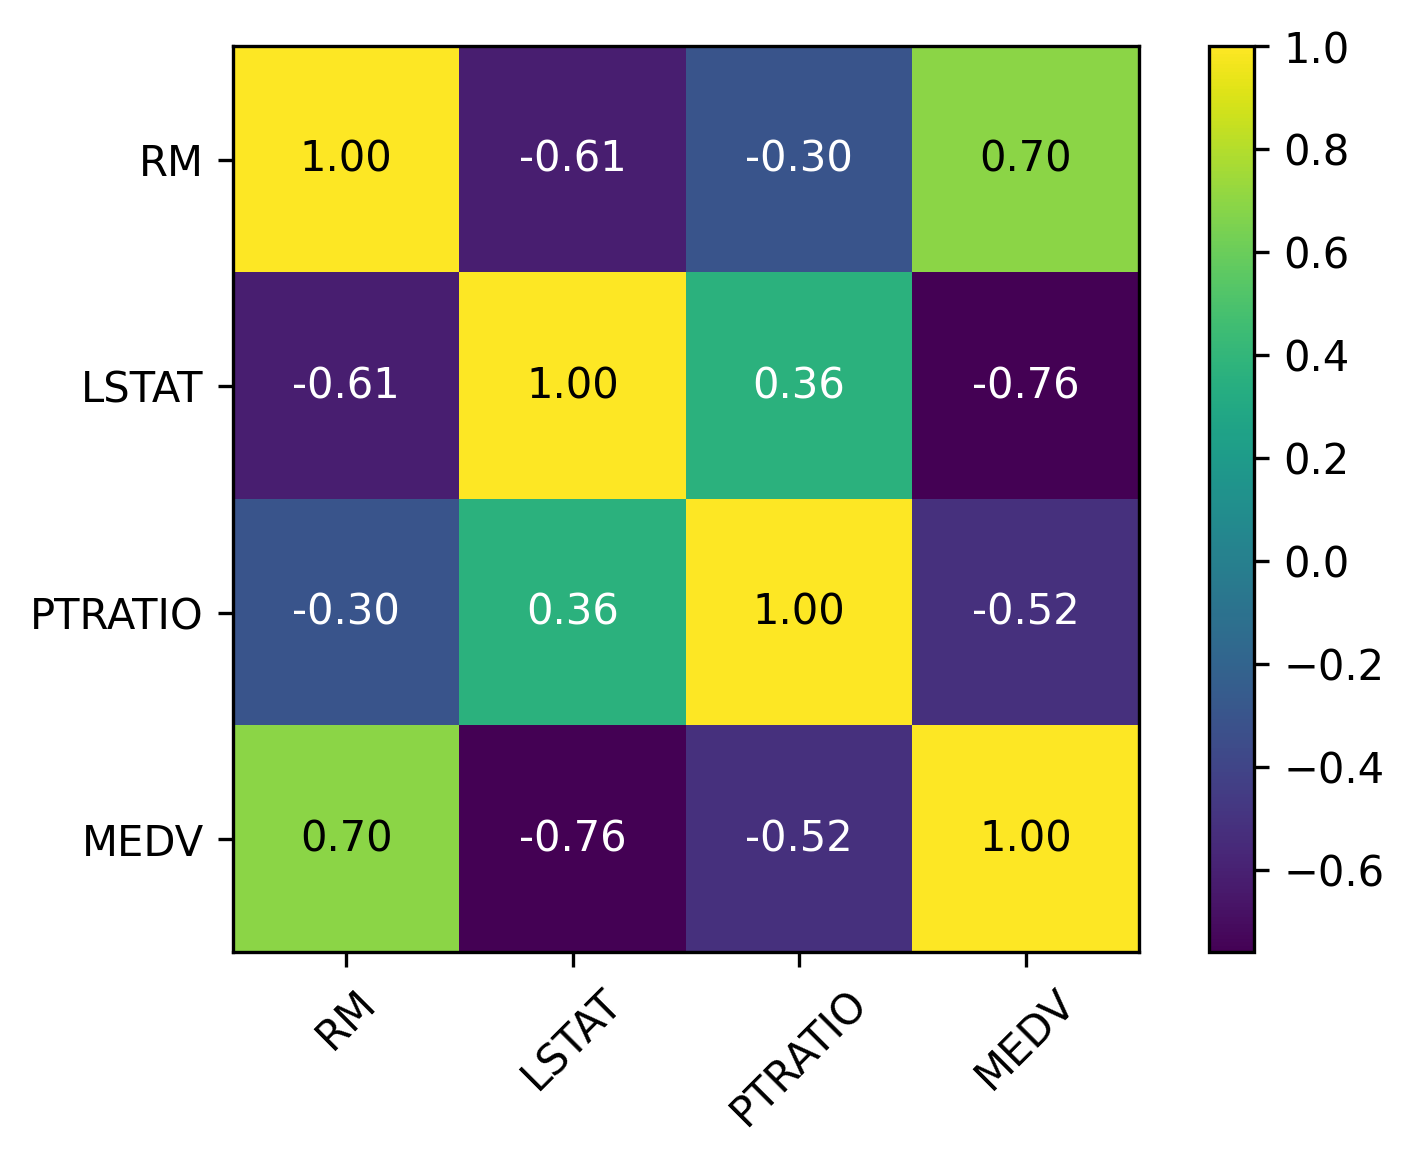

In [49]:
cols = df.columns
cm = np.corrcoef(df[cols].values.T)
fig, ax = heatmap(cm,row_names=cols,column_names=cols)

fig.dpi = 300
fig.show()
fig.savefig('boston_corrs.png')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df[['LSTAT', 'RM']].values
y = df.MEDV
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.6644235495547175

In [9]:
df[['LSTAT', 'RM']]

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
484,9.67,6.593
485,9.08,6.120
486,5.64,6.976
487,6.48,6.794


In [10]:
quadratic = PolynomialFeatures(degree=2)
X = df[['RM']].values
X_quad = quadratic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = LinearRegression()
regr = regr.fit(X, y)
#y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
y_quad_fit = regr.predict(X_fit)
quadratic_r2 = regr.score(X,y)

In [11]:
X_quad

array([[ 1.      ,  6.575   , 43.230625],
       [ 1.      ,  6.421   , 41.229241],
       [ 1.      ,  7.185   , 51.624225],
       ...,
       [ 1.      ,  6.976   , 48.664576],
       [ 1.      ,  6.794   , 46.158436],
       [ 1.      ,  6.03    , 36.3609  ]])

In [12]:
a = quadratic.fit_transform(X_fit)
a[:,2]

array([12.680721, 20.802721, 30.924721, 43.046721, 57.168721])

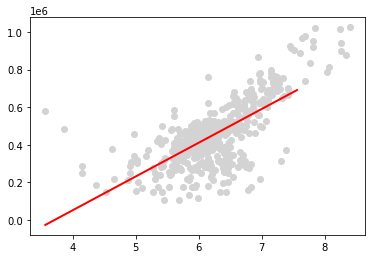

In [13]:
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_quad_fit,label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,color='red', lw=2, linestyle='-')

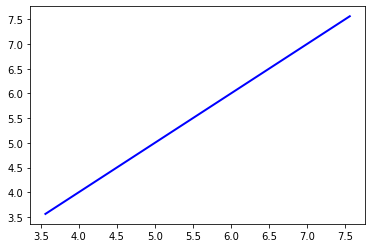

In [14]:
plt.plot(X_fit, a[:,1],label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,color='blue', lw=2, linestyle='-')

In [15]:
X = pd.DataFrame([df.LSTAT, df.RM, df.PTRATIO, df.LSTAT.pow(2)]).T.values
y = df.MEDV
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.7574344256411116

In [16]:
X['LSTAT2'] = df.LSTAT.pow(2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
X = pd.DataFrame([df.LSTAT, df.RM, df.LSTAT.pow(2)]).T.va

AttributeError: 'DataFrame' object has no attribute 'va'

In [18]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [19]:
import itertools
from sklearn.model_selection import train_test_split

l = [df.LSTAT, df.RM, df.PTRATIO, pd.Series(df.LSTAT.pow(2), name="LSTAT2")]
scores = {}
for i in range(200):
    for r in range(1,5):
        a = list(itertools.combinations(l, r))
        for e in a:
            name = ""
            for d in e:
                name += d.name + ", "
            X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(e).T.values, df.MEDV, test_size=0.3)

            reg = LinearRegression().fit(X_train, y_train)
            if name not in scores:
                scores[name] = []
            scores[name].append(reg.score(X_test, y_test))
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60


KeyboardInterrupt: 

In [20]:
for s in scores.keys():
    print(s + ": " + str(np.round(np.mean(scores[s]), 2)))

LSTAT, : 0.57
RM, : 0.46
PTRATIO, : 0.24
LSTAT2, : 0.42
LSTAT, RM, : 0.65
LSTAT, PTRATIO, : 0.64
LSTAT, LSTAT2, : 0.65
RM, PTRATIO, : 0.59
RM, LSTAT2, : 0.57
PTRATIO, LSTAT2, : 0.53
LSTAT, RM, PTRATIO, : 0.7
LSTAT, RM, LSTAT2, : 0.71
LSTAT, PTRATIO, LSTAT2, : 0.69
RM, PTRATIO, LSTAT2, : 0.65
LSTAT, RM, PTRATIO, LSTAT2, : 0.74


In [21]:
range(5)

range(0, 5)

In [22]:
from ml_fingerprint import example_models

model, score = example_models.boston_regression(1)
print(score)
model, score = example_models.boston_regression(2)
print(score)
model, score = example_models.boston_regression(3)
print(score)

0.5451559253784235
0.6397745145679041
0.7135072267106497


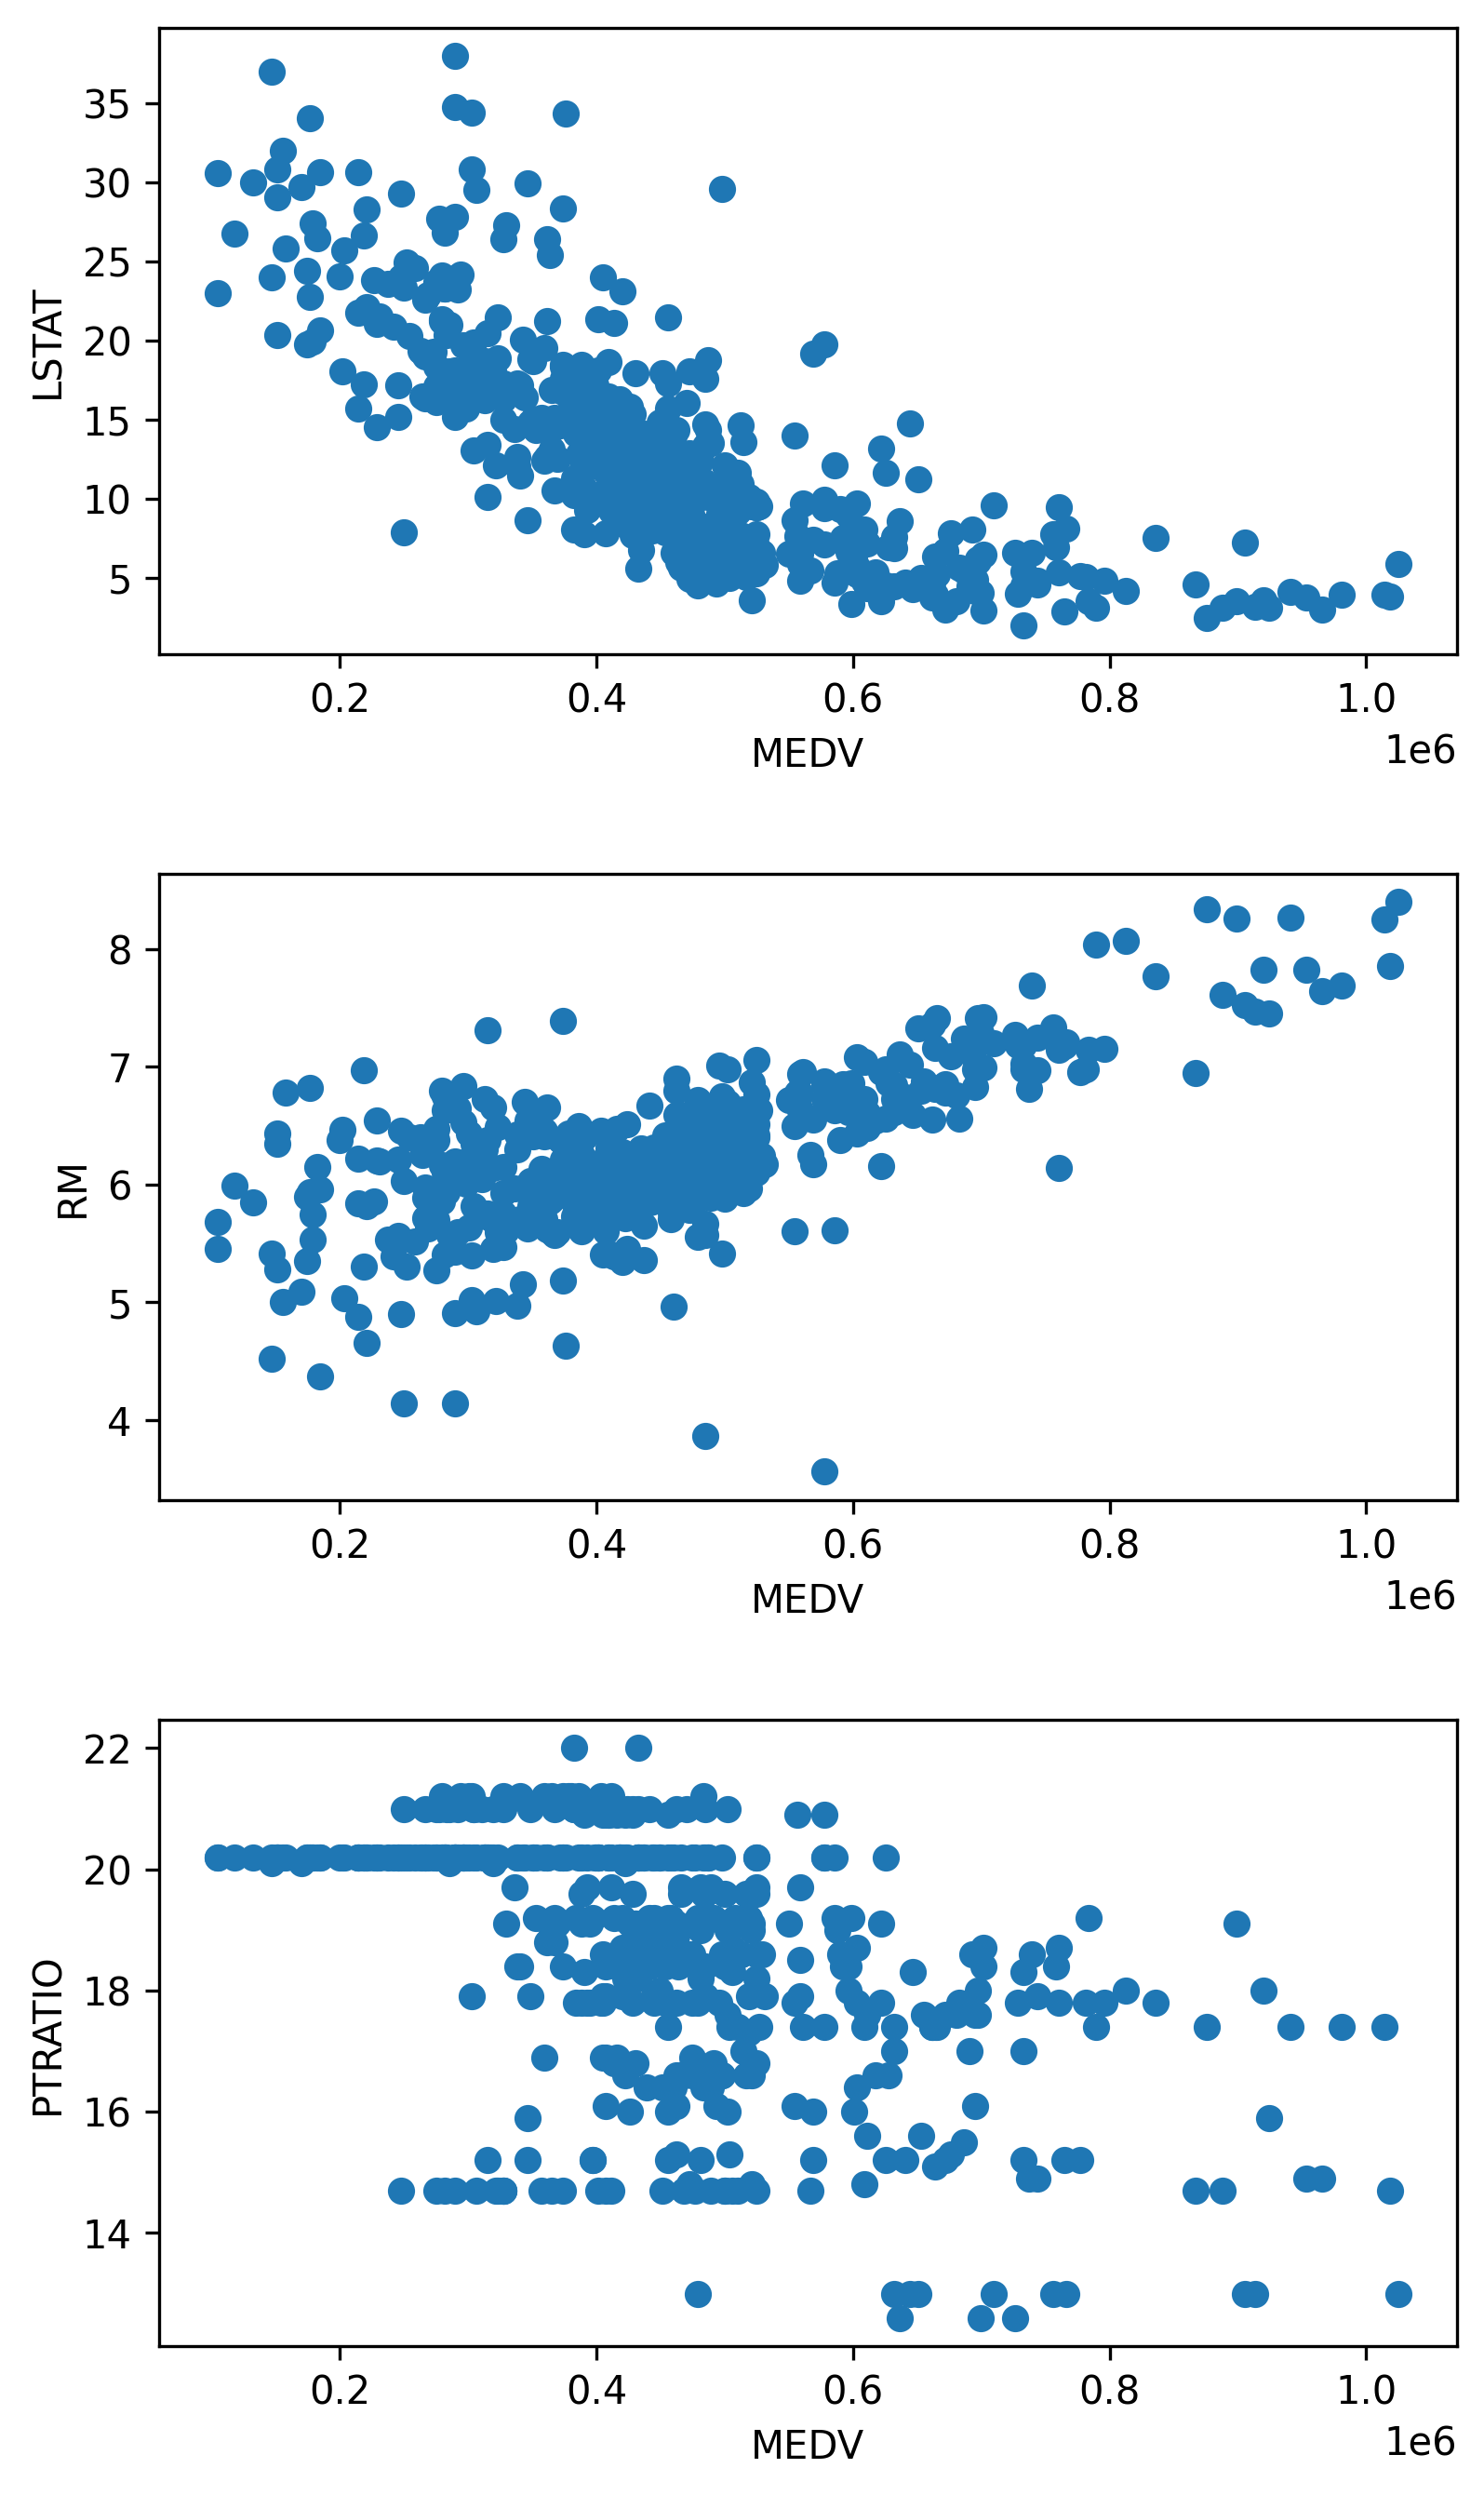

In [44]:


fig, axs = plt.subplots(3)
fig.set_size_inches(6, 11)
axs[0].scatter(df.MEDV, df.LSTAT)
axs[1].scatter(df.MEDV, df.RM)
axs[2].scatter(df.MEDV, df.PTRATIO)

axs[0].set(xlabel="MEDV", ylabel="LSTAT")
axs[1].set(xlabel="MEDV", ylabel="RM")
axs[2].set(xlabel="MEDV", ylabel="PTRATIO")

fig.dpi=300
plt.subplots_adjust(hspace=0.35)
plt.show()
fig.savefig('boston_scatters.png')

In [4]:
from ml_fingerprint import remote, example_models
import datetime

apikey = '_zV1LG_7Fvwyum_KlHORLQ'
url = "http://localhost"
r = remote.RemoteServer(url, apikey, True)

model, score = example_models.boston_regression(1)
r.insert_model(model, "boston_regression", True, "regression", {"R2":score}, "1", {}, datetime.datetime.now(), "Predicción de precios de viviendas en Boston.")

model, score = example_models.boston_regression(2)
r.insert_model(model, "boston_regression", True, "regression", {"R2":score}, "2", {}, datetime.datetime.now(), "Predicción de precios de viviendas en Boston.")

model, score = example_models.boston_regression(3)
r.insert_model(model, "boston_regression", True, "regression", {"R2":score}, "3", {}, datetime.datetime.now(), "Predicción de precios de viviendas en Boston.")